In [1]:
import pandas as pd

In [2]:
import gseapy as gp

In [3]:
import networkx as nx

In [4]:
from itertools import chain, repeat

In [5]:
import math

1.	Realizar a análise de Enriquecimento usando o método GSEA:

In [6]:
down = pd.read_csv("Sup-Table-4-List_of_Down_regulated_Erosion_vs_Without-Erosion.csv")

In [7]:
down.head()

,Ensembl.ID,Gene_name,log2FoldChange,padj
0,ENSG00000131845,ZNF304,-0.585086,0.029046
1,ENSG00000156502,SUPV3L1,-0.586085,0.001891
2,ENSG00000154781,CCDC174,-0.588956,0.008869
3,ENSG00000088038,CNOT3,-0.588963,0.036274
4,ENSG00000141367,CLTC,-0.590050,0.000862


In [8]:
# Podemos ver os "gene sets" que estão incluídos no gseapy. Alguns deles não estão atualizados
# Portanto, nesta tarefa vamos usar um arquivo gmt baixado do MSigDB (https://www.gsea-msigdb.org/gsea/msigdb/)
gp.get_library_name()[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [9]:
down.iloc[:, 1:3]

,Gene_name,log2FoldChange
0,ZNF304,-0.585086
1,SUPV3L1,-0.586085
2,CCDC174,-0.588956
3,CNOT3,-0.588963
4,CLTC,-0.590050
...,...,...
1046,AHNAK2,-7.266606
1047,RAB3B,-7.360638
1048,PRRX1,-8.452209
1049,LARP6,-8.603596


In [13]:
# Executar a análise de enriquecimento
# O Enrichr usa o Fisher exact test
#del enrichr_down

In [10]:
enr = gp.enrichr(gene_list=down.Gene_name,gene_sets=['gene_sets_GOBP.gmt'], outdir=None) 

#enr = gp.enrichr(gene_list=down.Gene_name,gene_sets=['Reactome_2022', "h.all.v2023.2.Hs.symbols.gmt"], outdir=None) # Para usar a versão do mesmo arquivo gmt do gseapy.get_library_name()

#resultado da análise

enrichr_down = enr.results

enrichr_down.head()


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene_sets_GOBP.gmt,GOBP_APICAL_PROTEIN_LOCALIZATION,2/15,0.291213,0.865932,2.410737,2.974129,DLG5;SHROOM3
1,gene_sets_GOBP.gmt,GOBP_APOLIPOPROTEIN_A_I_MEDIATED_SIGNALING_PAT...,1/7,0.404785,0.865932,3.001380,2.714447,ABCA1
2,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_CELL_CLEARANCE,3/48,0.676549,0.974958,0.998460,0.390148,C3;TYRO3;AXL
3,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_CHROMOSOME_CONDENSATION,1/6,0.358971,0.865932,3.547630,3.634595,TOP2A
4,gene_sets_GOBP.gmt,GOBP_APOPTOTIC_MITOCHONDRIAL_CHANGES,5/109,0.897841,0.999951,0.679661,0.073242,LMNA;CAMK2A;MLLT11;SLC25A4;NOL3


In [11]:
# somente os resultados estatisticamente significativos
enrichr_down = enrichr_down[enrichr_down["Adjusted P-value"]<0.05]

enrichr_down.reset_index(drop=True, inplace=True)
enrichr_down

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene_sets_GOBP.gmt,GOBP_APPENDAGE_DEVELOPMENT,30/182,0.000012,0.000981,2.699048,30.670483,HOXA10;INTU;PITX1;SCX;ZNF219;TBX2;RPGRIP1L;TUL...
1,gene_sets_GOBP.gmt,GOBP_AXON_DEVELOPMENT,62/513,0.000019,0.001004,1.909859,20.718550,APLP1;NFIB;UNC5B;FGF13;OLIG2;EFNA5;PTPRM;SLITR...
2,gene_sets_GOBP.gmt,GOBP_CELL_CELL_SIGNALING_BY_WNT,57/462,0.000024,0.001004,1.949077,20.752485,MARK1;DDIT3;NKD1;NFATC4;CELSR3;APCDD1L;PTPRU;T...
3,gene_sets_GOBP.gmt,GOBP_INTEGRIN_MEDIATED_SIGNALING_PATHWAY,17/113,0.002558,0.048041,2.402710,14.340272,ITGA7;PLPP3;DST;LAMB2;EMP2;DOCK1;COL16A1;ITGA3...
4,gene_sets_GOBP.gmt,GOBP_OSSIFICATION,57/443,0.000007,0.000981,2.051237,24.447882,MRC2;INTU;ID3;SATB2;SCX;ENPP1;MMP16;PTN;BMP2;B...
5,gene_sets_GOBP.gmt,GOBP_OSTEOBLAST_DIFFERENTIATION,33/257,0.000650,0.013740,2.003750,14.703343,MRC2;ID3;SATB2;BMP2;BMP4;YAP1;FERMT2;PTCH1;IGF...
6,gene_sets_GOBP.gmt,GOBP_REGULATION_OF_CANONICAL_WNT_SIGNALING_PAT...,34/262,0.000444,0.010728,2.030478,15.672943,NKD1;DDIT3;PTPRU;CSNK1E;PLEKHA4;BMP2;UBR5;FZD7...
7,gene_sets_GOBP.gmt,GOBP_REGULATION_OF_WNT_SIGNALING_PATHWAY,42/339,0.000270,0.008182,1.933147,15.886940,DDIT3;NKD1;NFATC4;APCDD1L;PTPRU;TSKU;CSNK1E;TC...
8,gene_sets_GOBP.gmt,GOBP_VASCULATURE_DEVELOPMENT,85/832,0.000290,0.008182,1.583941,12.899540,DDAH1;YAP1;STARD13;SERPINE1;TJP1;SCG2;COL27A1;...


In [12]:
type(enrichr_down)

pandas.core.frame.DataFrame

In [13]:
pd.options.mode.chained_assignment = None # disable the warning
enrichr_down.replace('GOBP_', '', regex=True, inplace=True)
enrichr_down.replace('_', ' ', regex=True, inplace=True)
enrichr_down

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes
0,gene sets GOBP.gmt,APPENDAGE DEVELOPMENT,30/182,0.000012,0.000981,2.699048,30.670483,HOXA10;INTU;PITX1;SCX;ZNF219;TBX2;RPGRIP1L;TUL...
1,gene sets GOBP.gmt,AXON DEVELOPMENT,62/513,0.000019,0.001004,1.909859,20.718550,APLP1;NFIB;UNC5B;FGF13;OLIG2;EFNA5;PTPRM;SLITR...
2,gene sets GOBP.gmt,CELL CELL SIGNALING BY WNT,57/462,0.000024,0.001004,1.949077,20.752485,MARK1;DDIT3;NKD1;NFATC4;CELSR3;APCDD1L;PTPRU;T...
3,gene sets GOBP.gmt,INTEGRIN MEDIATED SIGNALING PATHWAY,17/113,0.002558,0.048041,2.402710,14.340272,ITGA7;PLPP3;DST;LAMB2;EMP2;DOCK1;COL16A1;ITGA3...
4,gene sets GOBP.gmt,OSSIFICATION,57/443,0.000007,0.000981,2.051237,24.447882,MRC2;INTU;ID3;SATB2;SCX;ENPP1;MMP16;PTN;BMP2;B...
5,gene sets GOBP.gmt,OSTEOBLAST DIFFERENTIATION,33/257,0.000650,0.013740,2.003750,14.703343,MRC2;ID3;SATB2;BMP2;BMP4;YAP1;FERMT2;PTCH1;IGF...
6,gene sets GOBP.gmt,REGULATION OF CANONICAL WNT SIGNALING PATHWAY,34/262,0.000444,0.010728,2.030478,15.672943,NKD1;DDIT3;PTPRU;CSNK1E;PLEKHA4;BMP2;UBR5;FZD7...
7,gene sets GOBP.gmt,REGULATION OF WNT SIGNALING PATHWAY,42/339,0.000270,0.008182,1.933147,15.886940,DDIT3;NKD1;NFATC4;APCDD1L;PTPRU;TSKU;CSNK1E;TC...
8,gene sets GOBP.gmt,VASCULATURE DEVELOPMENT,85/832,0.000290,0.008182,1.583941,12.899540,DDAH1;YAP1;STARD13;SERPINE1;TJP1;SCG2;COL27A1;...


In [14]:
# A coluna Genes indica os genes associados com as vias
# Vamos passar essa informação para um DataFrame com duas colunas (uma via ==> um gene)

pathways = {}

In [15]:
for ind in enrichr_down.index:
    
    path = enrichr_down.iloc[ind, 1]
    genes = enrichr_down.loc[ind, "Genes"]

    genes = genes.strip().split(";")

    pathways[path] = genes

    #if len(genes) < 5:
        
        #break
    #else:
        #pathways[path] = genes

    df = pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )    

In [16]:
df.head()

,geneset,genesymbol
0,APPENDAGE DEVELOPMENT,HOXA10
1,APPENDAGE DEVELOPMENT,INTU
2,APPENDAGE DEVELOPMENT,PITX1
3,APPENDAGE DEVELOPMENT,SCX
4,APPENDAGE DEVELOPMENT,ZNF219


2. rede das vias enriquecidas

In [17]:
G = nx.Graph() # Crear um grafo non direcionado 

In [18]:
# adicionar nós
G.add_nodes_from(df['geneset'])

In [19]:
G.add_nodes_from(df['genesymbol'])

In [20]:
# Definir as arestas
edges = [(row['geneset'], row['genesymbol']) for index, row in df.iterrows()]

In [21]:
edges[:20]

[('APPENDAGE DEVELOPMENT', 'HOXA10'),
 ('APPENDAGE DEVELOPMENT', 'INTU'),
 ('APPENDAGE DEVELOPMENT', 'PITX1'),
 ('APPENDAGE DEVELOPMENT', 'SCX'),
 ('APPENDAGE DEVELOPMENT', 'ZNF219'),
 ('APPENDAGE DEVELOPMENT', 'TBX2'),
 ('APPENDAGE DEVELOPMENT', 'RPGRIP1L'),
 ('APPENDAGE DEVELOPMENT', 'TULP3'),
 ('APPENDAGE DEVELOPMENT', 'BMP4'),
 ('APPENDAGE DEVELOPMENT', 'HOXC10'),
 ('APPENDAGE DEVELOPMENT', 'ASPH'),
 ('APPENDAGE DEVELOPMENT', 'FERMT2'),
 ('APPENDAGE DEVELOPMENT', 'TBX3'),
 ('APPENDAGE DEVELOPMENT', 'PTCH1'),
 ('APPENDAGE DEVELOPMENT', 'SLC7A11'),
 ('APPENDAGE DEVELOPMENT', 'CTNNB1'),
 ('APPENDAGE DEVELOPMENT', 'NOG'),
 ('APPENDAGE DEVELOPMENT', 'CACNA1C'),
 ('APPENDAGE DEVELOPMENT', 'LARGE1'),
 ('APPENDAGE DEVELOPMENT', 'PRRX1')]

In [22]:
#adicionar as arestas
G.add_edges_from(edges)

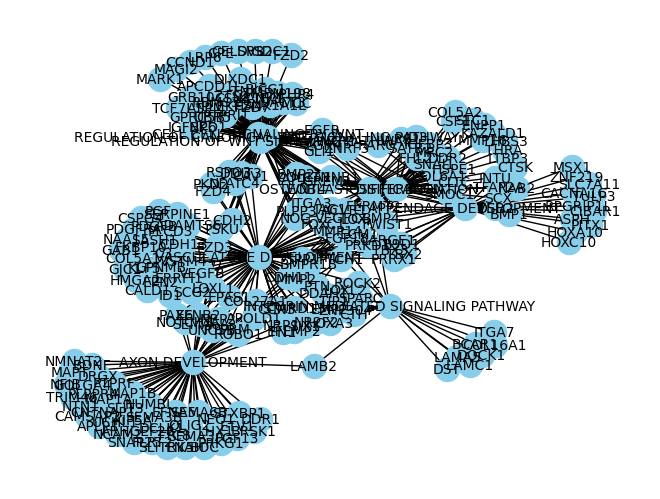

In [23]:
import matplotlib.pyplot as plt
# definir o layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_color='black')
# Mostrar o grafo
plt.show()

In [38]:
# Vamos exportar para melhor visualização no cytoscape

In [24]:
nx.write_gml(G, "Down_regulated_network_2.gml")